In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Reading Data Set

train = pd.read_csv("drugLibTrain_raw.tsv" , sep= '\t')
test = pd.read_csv("drugLibTest_raw.tsv" , sep= '\t')

In [60]:
train.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [61]:
test.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [62]:
# Concatenate test and train data set

data = pd.concat([train, test], axis = 0)

In [63]:
data = data.reset_index()

In [64]:
data.head()

,index,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              4143 non-null   int64 
 1   Unnamed: 0         4143 non-null   int64 
 2   urlDrugName        4143 non-null   object
 3   rating             4143 non-null   int64 
 4   effectiveness      4143 non-null   object
 5   sideEffects        4143 non-null   object
 6   condition          4142 non-null   object
 7   benefitsReview     4143 non-null   object
 8   sideEffectsReview  4141 non-null   object
 9   commentsReview     4135 non-null   object
dtypes: int64(3), object(7)
memory usage: 323.8+ KB


In [66]:
data.describe()

,index,Unnamed: 0,rating
count,4143.000000,4143.000000,4143.000000
mean,1294.062515,2081.808834,6.946416
std,909.361540,1202.018138,2.948868
min,0.000000,0.000000,1.000000
25%,517.500000,1041.500000,5.000000
50%,1035.000000,2083.000000,8.000000
75%,2070.500000,3123.500000,9.000000
max,3106.000000,4161.000000,10.000000


In [67]:
# Renaming column to remove space

data=data.rename(columns = {'Unnamed: 0' : 'product_id', 'urlDrugName' : 'DrugName'}, inplace = False)

In [68]:
data.shape

(4143, 10)

In [69]:
# check for null values 

data.isna().sum()

index                0
product_id           0
DrugName             0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [70]:
# Remove null values

data = data.dropna()

In [71]:
data.isna().sum()

index                0
product_id           0
DrugName             0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64

In [72]:
DrugID = data.groupby('DrugName').product_id

In [73]:
pd.DataFrame (data=DrugID)

,0,1
0,abilify,189 3883 237 3885 1068 3880 1754 ...
1,acanya,"3655 3494 Name: product_id, dtype: int64"
2,accolate,"1531 2242 Name: product_id, dtype: int64"
3,accupril,"603 2086 Name: product_id, dtype: int64"
4,accutane,47 714 114 705 143 691 327 70...
...,...,...
535,zyban,125 2957 184 2956 676 2951 904 ...
536,zyprexa,229 37 302 40 698 41 1124 43 14...
537,zyrtec,437 2173 759 2156 1042 2155 1208 ...
538,zyrtec-d,917 823 1173 822 3008 820 3907 82...


**1: We can see that same drugName have different product_id and one product_id is not repeated for same drugName.**

**2: So we can drop product_id column**

In [74]:
data = data.drop('product_id', axis = 1)

In [75]:
data.effectiveness.value_counts()

Highly Effective          1738
Considerably Effective    1235
Moderately Effective       570
Ineffective                327
Marginally Effective       262
Name: effectiveness, dtype: int64

In [76]:
# Relabeling effectiveness 
def relabel(x):
    return 0 if x == 'Ineffective' else 1 if x == 'Marginally Effective' else 2 if x == 'Moderately Effective' else 3 if x == 'Considerably Effective' else 4

data['effectiveness'] = data.effectiveness.apply(relabel)

In [77]:
data.sideEffects.value_counts()

Mild Side Effects                1347
No Side Effects                  1193
Moderate Side Effects             848
Severe Side Effects               489
Extremely Severe Side Effects     255
Name: sideEffects, dtype: int64

In [78]:
# Relabeling SideEffects 
def relabel(x):
    return 0 if x == 'No Side Effects' else 1 if x == 'Mild Side Effects' else 2 if x == 'Moderate Side Effects' else 3 if x == 'Severe Side Effects' else 4

data['sideEffects'] = data.sideEffects.apply(relabel)
data.head()

,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,enalapril,4,4,1,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,ortho-tri-cyclen,1,4,3,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,2,ponstel,10,4,0,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,prilosec,3,1,1,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,4,lyrica,2,1,3,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [79]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Drugs present in the Dataset :", data['DrugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

Number of Unique Drugs present in the Dataset : 540
Number of Unique Medical Conditions present in the Dataset : 1804


In [80]:
data.sideEffectsReview[0]

'cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness'

In [81]:
# Checking unique values of all columns
data.apply(lambda x: len(x.unique()))

index                3099
DrugName              540
rating                 10
effectiveness           5
sideEffects             5
condition            1804
benefitsReview       4017
sideEffectsReview    3738
commentsReview       4053
dtype: int64

In [82]:
df = [[col, data[col].nunique()] for col in data.columns.difference(["commentsReview", 'benefitsReview', 'sideEffectsReview'])]
uniques = pd.DataFrame(data=df, columns=["columns", "num of unique values"])

In [83]:
# conda install -c conda-forge altair vega_datasets notebook vega

In [84]:
# Visualizing unique values of features

import altair as alt

bars = (alt.Chart()
           .mark_bar(size=25, 
                     color="#FFAA00",
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7)
           .encode(x=alt.X(shorthand="num of unique values:Q",
                           scale=alt.Scale(type="log"),
                           axis=alt.Axis(title="num of unique values, log scaled")),
                   y=alt.Y("columns:O", sort="-x"),
                   tooltip=("num of unique values:Q",
                            "columns:O",),
                   color=alt.Color("num of unique values",
                                   scale=alt.Scale(scheme="lightgreyteal",
                                                   type="log")))
           .properties(title='Unique Values'))

text = (alt.Chart()
           .mark_text(align="left",
                      baseline="middle",
                      dx=3)
           .encode(x=alt.X(shorthand="num of unique values:Q"),
                   y=alt.Y("columns:O",
                           axis=alt.Axis(title="columns",
                                         grid=False),
                           sort="-x"),
                   text="num of unique values:Q"))

chart = ((alt.layer(bars, text, data=uniques)
             .configure(background='#11043a')
             .configure_title(font="Arial",
                              fontSize=18,
                              color="#e6f3ff",
                              dy=-10)
             .configure_text(color="white")
             .configure_legend(titleFontSize=12,
                               titleColor="white",
                               tickCount=10,
                               titleOpacity=0.8,
                               labelColor="white",
                               labelOpacity=0.7,
                               titlePadding=10)
             .configure_axis(titleFontSize=13,
                             titlePadding=20,
                             titleColor="white",
                             titleOpacity=0.8,
                             labelColor="white",
                             labelOpacity=0.7,
                             labelFontSize=11,
                             tickOffset=0,
                             grid=True,
                             gridOpacity=0.15)
             .configure_view(strokeWidth=0)
             .properties(height=200, width=680)))

chart

alt.LayerChart(...)

**There are 1804 unique values for condition and 540 unique Drug Names.**

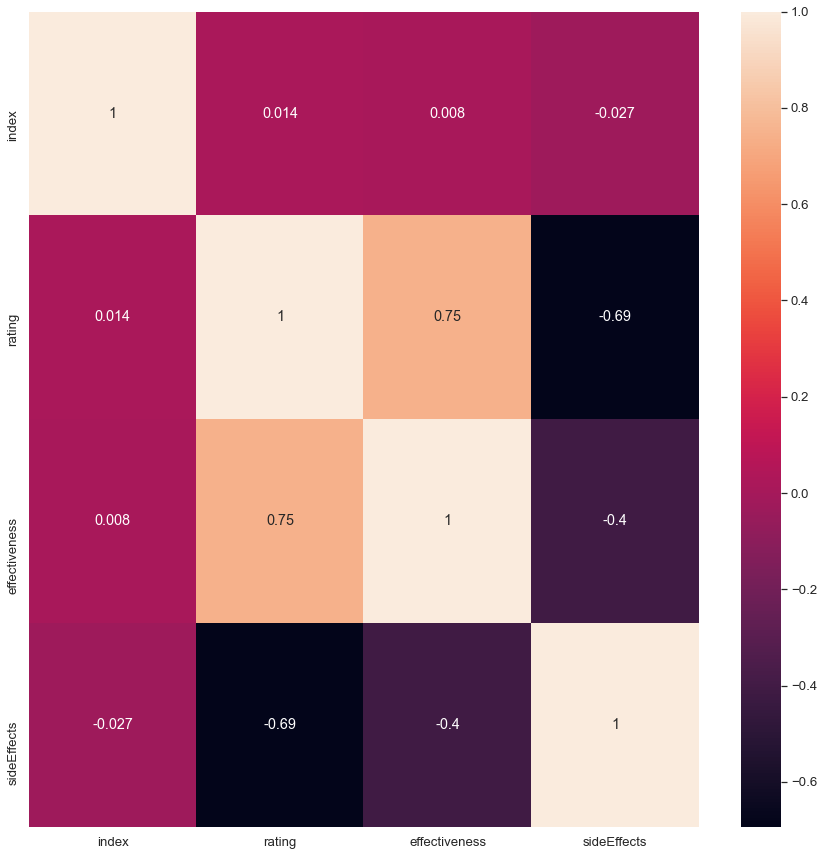

In [85]:
# Correlation Analysis

sns.heatmap(data.corr(), annot=True)

**Correlation analysis shows positive relationship between effectiveness and rating with score of 0.75**

Text(0.5, 0, 'Rating')

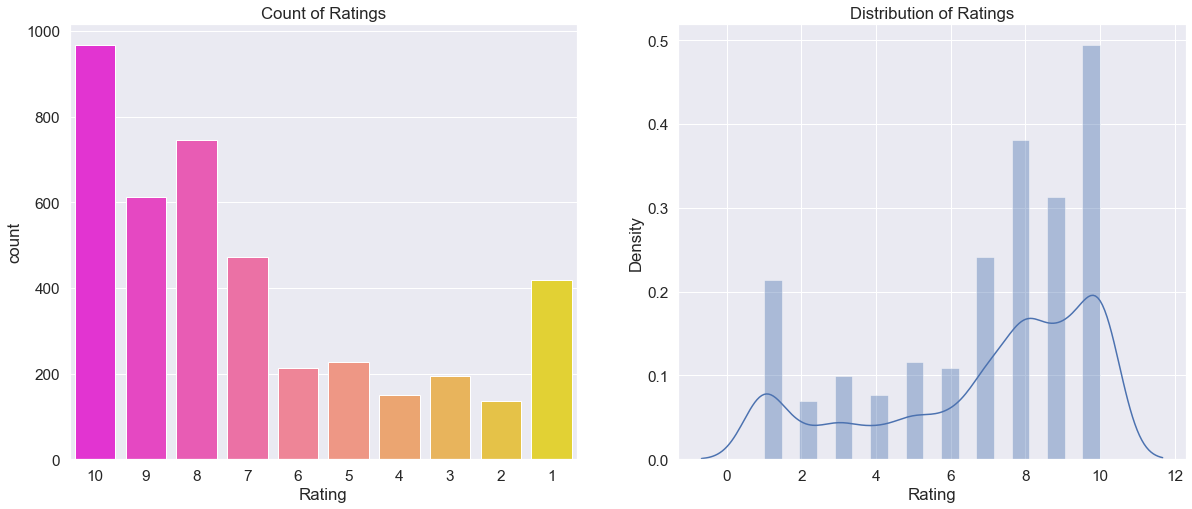

In [86]:
# A countplot of the ratings so we can see the distribution of the ratings

plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

In [87]:
list(data["rating"].value_counts())

[967, 745, 612, 471, 419, 226, 214, 194, 149, 135]

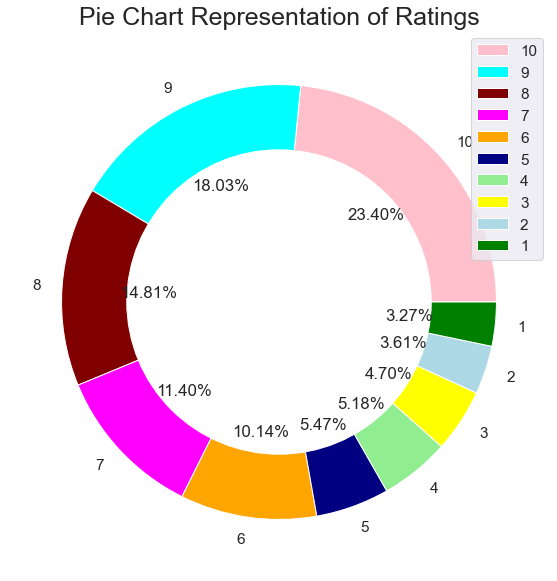

In [88]:
# making a donut chart to represent share of each ratings

size = [967, 745, 612, 471, 419, 226, 214, 194, 149, 135]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow', 'lightblue', 'green']
labels = "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

**From above donut chart it can be inferred that more than 50% of ratings fall between range of 7-10.**

In [89]:
#  Distribution of drugs within conditions

ds_drugs_per_cond = data.groupby('condition').DrugName.nunique().sort_values(ascending=False)
pd.DataFrame (data=ds_drugs_per_cond)
ds_drugs_per_cond = ds_drugs_per_cond.reset_index()

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

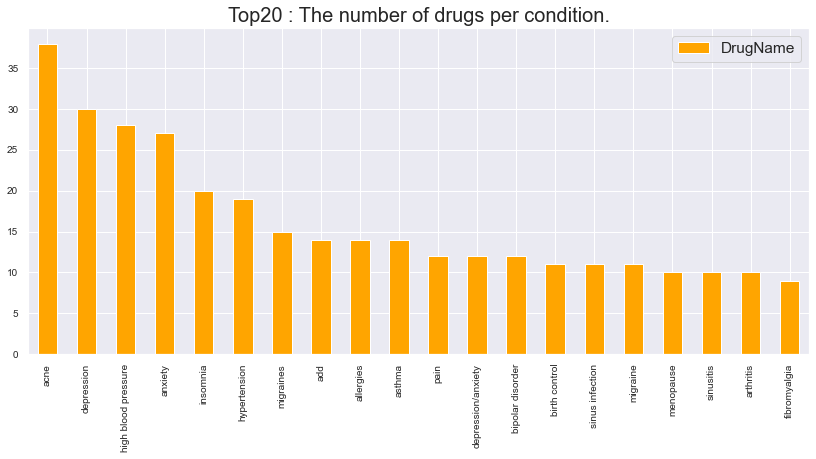

In [90]:
# Number of Drugs available per condition

ds_drugs_per_cond[0:20].plot(kind="bar", x= 'condition', y = 'DrugName', figsize = (14,6), fontsize = 10,color="orange")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

**Acne is leading condition for which we have maximum availability of Drugs followed by depression, high BP etc.**

In [91]:
# Most comman conditions based on sideEffect reviews

ds_reviews_per_condition = data.groupby('condition').agg({'sideEffectsReview':'count'})
ds_reviews_per_condition = ds_reviews_per_condition.sort_values(by='sideEffectsReview', ascending=False)#[0:20]
ds_reviews_per_condition = ds_reviews_per_condition.reset_index()
ds_reviews_per_condition.head()

,condition,sideEffectsReview
0,depression,302
1,acne,210
2,anxiety,90
3,insomnia,75
4,birth control,68


<Figure size 864x432 with 0 Axes>

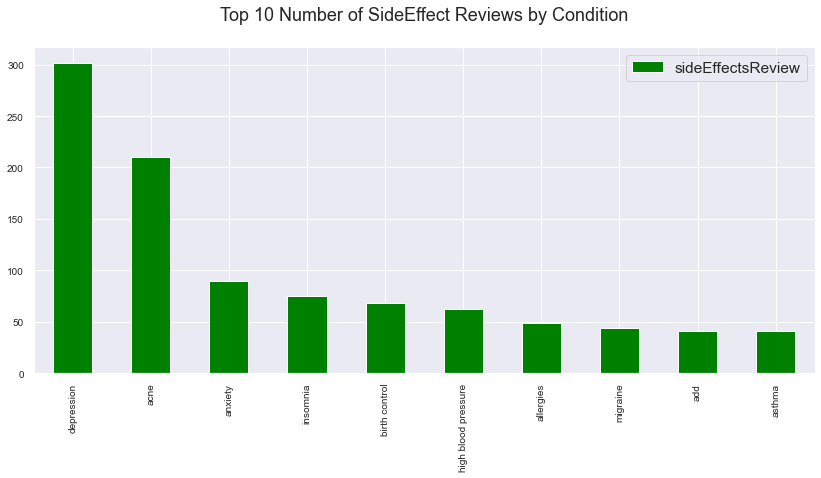

In [92]:
# Plotting reviews per conditions 
plt.figure(figsize=(12,6))
ds_reviews_per_condition[0:10].plot(kind="bar", x= 'condition', y = 'sideEffectsReview', figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 12)
plt.ylabel("", fontsize = 14)
plt.title("Top 10 Number of SideEffect Reviews by Condition\n", fontsize = 18)
plt.show()

**For condition depression maximum number of side effect reviews are available.**

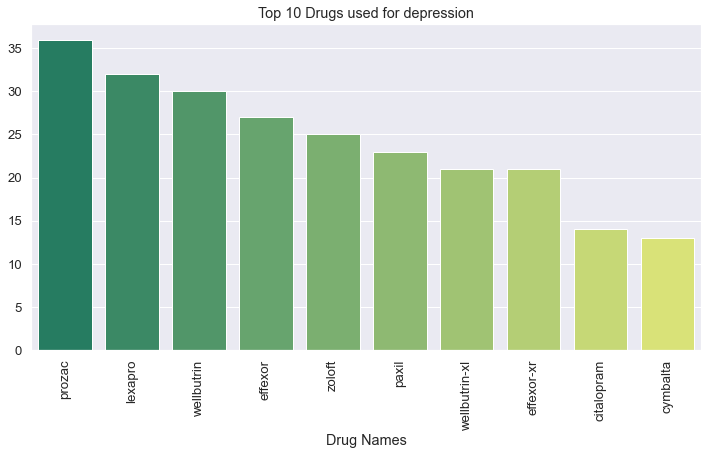

In [93]:
# Top 10 drugs which are used for the top condition, that is depression
df1 = data[data['condition'] == 'depression']['DrugName'].value_counts()[0: 10]
plt.figure(figsize=(12,6))
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

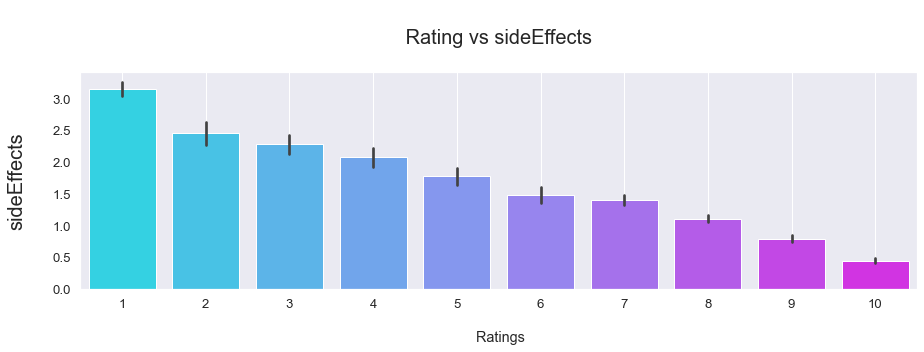

In [94]:
# lets check the Impact of SideEffects on rating

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['sideEffects'], palette = 'cool', orient = 'v')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('sideEffects\n', fontsize = 20)
plt.title('\n Rating vs sideEffects \n', fontsize = 20)
plt.show()

**For low rated drugs sideEffects are more while for highly rated drugs sideEffects are less.**

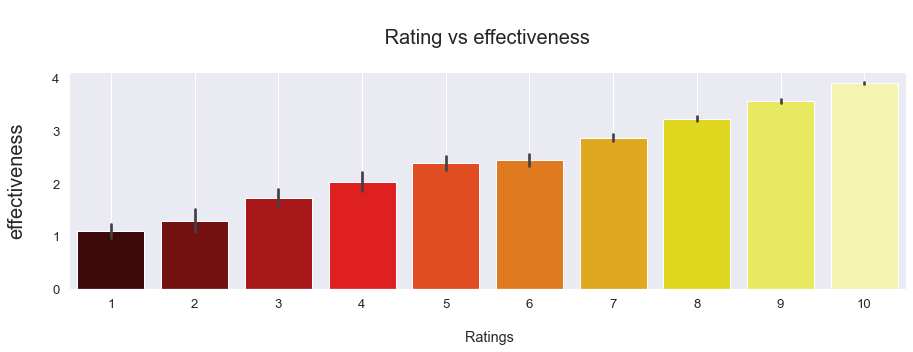

In [95]:
# lets check the Impact of effectiveness on Ratings 

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['effectiveness'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('effectiveness\n', fontsize = 20)
plt.title('\n Rating vs effectiveness \n', fontsize = 20)
plt.show()

**Rating and effectiveness have positive correlation. Higher the rating, higher is effectiveness of Drug.**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              4132 non-null   int64 
 1   DrugName           4132 non-null   object
 2   rating             4132 non-null   int64 
 3   effectiveness      4132 non-null   int64 
 4   sideEffects        4132 non-null   int64 
 5   condition          4132 non-null   object
 6   benefitsReview     4132 non-null   object
 7   sideEffectsReview  4132 non-null   object
 8   commentsReview     4132 non-null   object
dtypes: int64(4), object(5)
memory usage: 451.9+ KB


In [97]:
# Most comman conditions based on commentsReview 

ds_reviews_per_condition = data.groupby('condition').agg({'commentsReview':'count'})
ds_reviews_per_condition = ds_reviews_per_condition.sort_values(by='commentsReview', ascending=False)#[0:20]
ds_reviews_per_condition = ds_reviews_per_condition.reset_index()
ds_reviews_per_condition.head()

,condition,commentsReview
0,depression,302
1,acne,210
2,anxiety,90
3,insomnia,75
4,birth control,68


<Figure size 864x432 with 0 Axes>

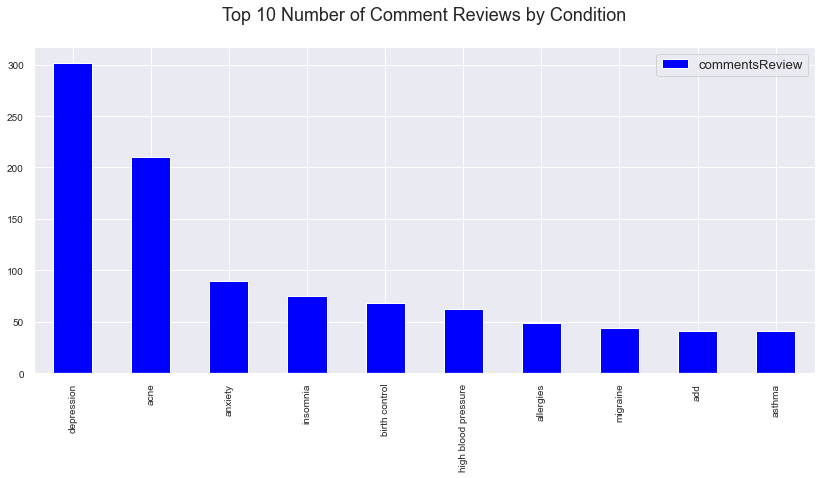

In [98]:
# Plotting reviews per conditions 
plt.figure(figsize=(12,6))
ds_reviews_per_condition[0:10].plot(kind="bar", x= 'condition', y = 'commentsReview', figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 12)
plt.ylabel("", fontsize = 14)
plt.title("Top 10 Number of Comment Reviews by Condition\n", fontsize = 18)
plt.show()

**Condition depression have maximum number of comment reviews available.**

In [99]:
from PIL import Image
wave_mask = np.array(Image.open( "heart.jpg"))

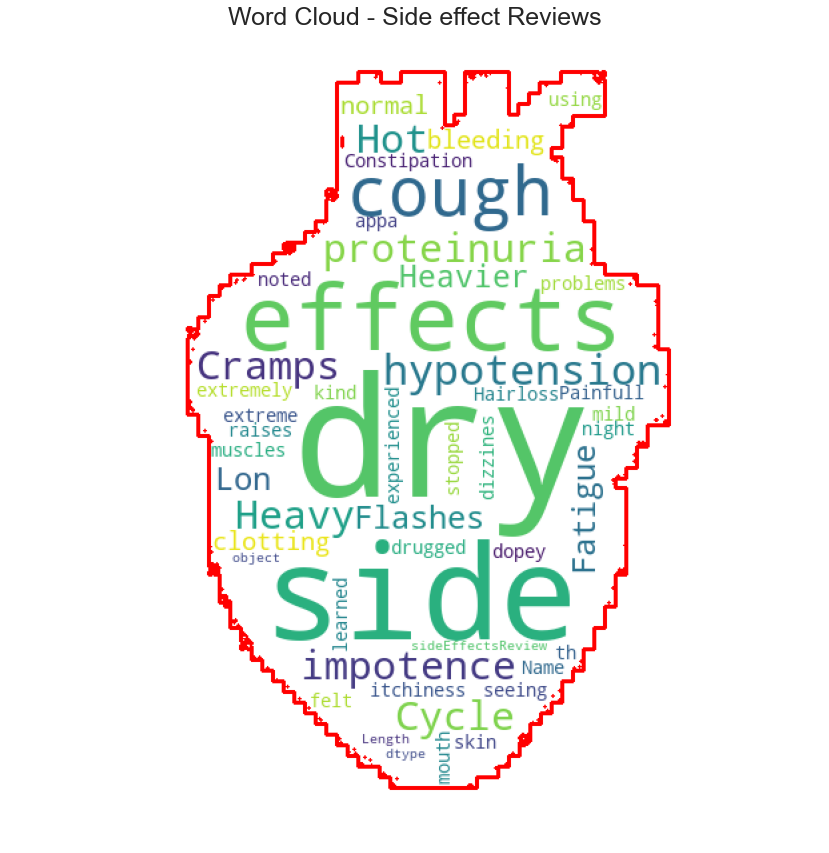

In [100]:
# let's see the words cloud for the side Effect reviews

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800, mask=wave_mask, contour_width=2, contour_color = 'red').generate(str(data['sideEffectsReview']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Side effect Reviews', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Wordcloud of sideEffect Reviews shows that cough, hypotension, proteinuria, cramps are some of common sideEffects.**

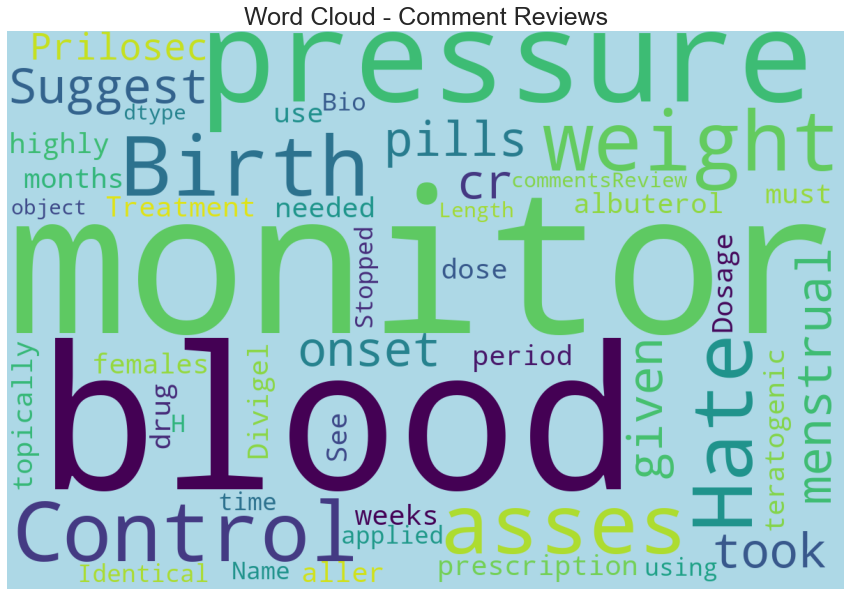

In [101]:
# let's see the words cloud for the comment reviews

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['commentsReview']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Comment Reviews', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Cleaning Drug Reviews

In [102]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
      
    # Removing all the special Characters
    special_remove = lower.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [103]:
# Lets clean data for whitespaces and special characters.

data['sideEffectsReview'] = review_clean(data['sideEffectsReview'])
data['commentsReview'] = review_clean(data['commentsReview'])
data['benefitsReview'] = review_clean(data['benefitsReview'])

In [52]:
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

    1.First, let's see what words are used as stopwords. 
    2.There are many words that include not, like needn't. 
    3.These words are key parts of emotional analysis, so we will remove them from stopwords.

In [112]:
stopwords = set(STOPWORDS)
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stop_words = stopwords.union(more_stopwords)

In [113]:
# Removing the stopwords

data['sideEffectsReview'] = data['sideEffectsReview'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data['commentsReview'] = data['commentsReview'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data['benefitsReview'] = data['benefitsReview'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [114]:
# Removing the word stems using the Snowball Stemmer

Snow_ball = SnowballStemmer('english')
data['sideEffectsReview'] = data['sideEffectsReview'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
data['commentsReview'] = data['commentsReview'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
data['benefitsReview'] = data['benefitsReview'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

### Sentiment Anaysis using Vader

In [115]:
# Using Vader tool for sentiment analysis

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [116]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [117]:
# Checking sentiment for cleaned review data

data["benifit_score"]= data["benefitsReview"].apply(sentiment.polarity_scores)
data["sideeffect_score"]= data["sideEffectsReview"].apply(sentiment.polarity_scores)
data["comment_score"]= data["commentsReview"].apply(sentiment.polarity_scores)

In [118]:
data["benifit_score"]=data["benifit_score"].apply(lambda score_dict : score_dict['compound'])
data["sideeffect_score"]=data["sideeffect_score"].apply(lambda score_dict : score_dict['compound'])
data["comment_score"]=data["comment_score"].apply(lambda score_dict : score_dict['compound'])

In [119]:
data.head()

,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benifit_score,sideeffect_score,comment_score
0,0,enalapril,4,4,1,management of congestive heart failure,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0.4215,-0.8176,-0.5423
1,1,ortho-tri-cyclen,1,4,3,birth prevention,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control suggest anyon,0.4767,0.3818,-0.5719
2,2,ponstel,10,4,0,menstrual cramps,use cramp bad leav ball bed least 2 day ponste...,heavier bleed clot normal,took 2 pill onset menstrual cramp everi 8 12 h...,-0.8225,0.0000,-0.7717
3,3,prilosec,3,1,1,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi go away medic sto...,given prilosec prescript dose 45mg per day med...,-0.5267,-0.2960,0.0000
4,4,lyrica,2,1,3,fibromyalgia,think lyrica start help pain side effect sever...,felt extrem drug dopey drive med extrem ankl f...,see,-0.1531,0.0000,0.0000


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_condition_label = data[["condition", 'DrugName']].apply(le.fit_transform)
data_condition_label.columns = ['condition_label', 'DrugName_label']

In [121]:
data_condition_label.nunique()

condition_label    1804
DrugName_label      540
dtype: int64

In [122]:
data = pd.concat([data, data_condition_label], axis=1)

In [123]:
data["condition_label"].max()

1803

In [124]:
data["condition_label"].min()

0

In [125]:
# creating target variable for side effect analysis using sideEffects columns
def relabel(x):
        return 0 if x == 0 else 1 

data['SideEffect_overall'] = data.sideEffects.apply(relabel)

In [126]:
data['SideEffect_overall'].value_counts()

1    2939
0    1193
Name: SideEffect_overall, dtype: int64

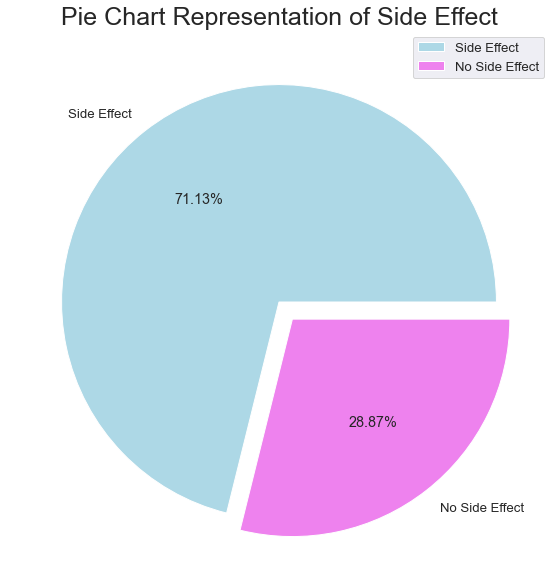

In [127]:
# a pie chart to represent the sentiments of the patients

size = [2939, 1193]
colors = ['lightblue', 'violet']
labels = "Side Effect","No Side Effect"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Side Effect', fontsize = 25)
plt.legend()
plt.show()


**Piechart distribution of target variable sideEffect_overall shows 71% of drug users reported sideEffects while 29% drug users do not experinced any sideEffects.**

In [128]:
data.head()

,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benifit_score,sideeffect_score,comment_score,condition_label,DrugName_label,SideEffect_overall
0,0,enalapril,4,4,1,management of congestive heart failure,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0.4215,-0.8176,-0.5423,999,176,1
1,1,ortho-tri-cyclen,1,4,3,birth prevention,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control suggest anyon,0.4767,0.3818,-0.5719,291,344,1
2,2,ponstel,10,4,0,menstrual cramps,use cramp bad leav ball bed least 2 day ponste...,heavier bleed clot normal,took 2 pill onset menstrual cramp everi 8 12 h...,-0.8225,0.0000,-0.7717,1024,373,0
3,3,prilosec,3,1,1,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi go away medic sto...,given prilosec prescript dose 45mg per day med...,-0.5267,-0.2960,0.0000,16,382,1
4,4,lyrica,2,1,3,fibromyalgia,think lyrica start help pain side effect sever...,felt extrem drug dopey drive med extrem ankl f...,see,-0.1531,0.0000,0.0000,623,279,1


In [129]:
data['vaderSentiment_SE']= data['sideeffect_score'].map(lambda x:int(1)if x>0 else int(0))
data['vaderSentiment_CS']= data['comment_score'].map(lambda x:int(2)if x>0.05 else int(0) if x<-0.05 else int(1))
data['vaderSentiment_BS']= data['benifit_score'].map(lambda x:int(2)if x>0.05 else int(0) if x<-0.05 else int(1))

In [130]:
data.head()

,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benifit_score,sideeffect_score,comment_score,condition_label,DrugName_label,SideEffect_overall,vaderSentiment_SE,vaderSentiment_CS,vaderSentiment_BS
0,0,enalapril,4,4,1,management of congestive heart failure,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0.4215,-0.8176,-0.5423,999,176,1,0,0,2
1,1,ortho-tri-cyclen,1,4,3,birth prevention,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control suggest anyon,0.4767,0.3818,-0.5719,291,344,1,1,0,2
2,2,ponstel,10,4,0,menstrual cramps,use cramp bad leav ball bed least 2 day ponste...,heavier bleed clot normal,took 2 pill onset menstrual cramp everi 8 12 h...,-0.8225,0.0000,-0.7717,1024,373,0,0,0,0
3,3,prilosec,3,1,1,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi go away medic sto...,given prilosec prescript dose 45mg per day med...,-0.5267,-0.2960,0.0000,16,382,1,0,1,0
4,4,lyrica,2,1,3,fibromyalgia,think lyrica start help pain side effect sever...,felt extrem drug dopey drive med extrem ankl f...,see,-0.1531,0.0000,0.0000,623,279,1,0,1,0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4142
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4132 non-null   int64  
 1   DrugName            4132 non-null   object 
 2   rating              4132 non-null   int64  
 3   effectiveness       4132 non-null   int64  
 4   sideEffects         4132 non-null   int64  
 5   condition           4132 non-null   object 
 6   benefitsReview      4132 non-null   object 
 7   sideEffectsReview   4132 non-null   object 
 8   commentsReview      4132 non-null   object 
 9   benifit_score       4132 non-null   float64
 10  sideeffect_score    4132 non-null   float64
 11  comment_score       4132 non-null   float64
 12  condition_label     4132 non-null   int32  
 13  DrugName_label      4132 non-null   int32  
 14  SideEffect_overall  4132 non-null   int64  
 15  vaderSentiment_SE   4132 non-null   int64  
 16  vaderS

In [133]:
data.to_csv('processed.csv.gz',compression='gzip')